# Exercise 1: Applying the Project Template

## Regression: The Diabetes dataset
    
The objective of the exercise is to apply the project template from lecture 6 on scikit-learn diabetes dataset.

## Contents:

1. [Prepare Project](#1.-Prepare-Project)
2. [Define Problem](#2.-Define-Problem)
3. [Exploratory Analysis](#3.-Exploratory-Analysis)
    - [The dimensions of the dataset](#The-dimensions-of-the-dataset)
    - [A peek at the data](#A-peek-at-the-data)
    - [Statistical summary of all attributes](#Statistical-summary-of-all-attributes)
    - [The class distribution (number of instances per class)](#The-class-distribution-(number-of-instances-per-class))
    - [Univariate plots to better understand each attribute](#Univariate-plots-to-better-understand-each-attribute)
    - [Multivariate plots to better understand relationships between attributes](#Multivariate-plots-to-better-understand-relationships-between-attributes)    
4. [Feature Engineering](#4.-Feature-Engineering)
5. [Evaluate Algorithms](#5.-Evaluate-Algorithms)
    - [Evaluate algorithms also with normalisation/standardisation (along with the baseline)](#Evaluate-algorithms-also-with-normalisation/standardisation-(along-with-the-baseline))   
6. [Improve Accuracy](#6.-Improve-Accuracy)
    - [Improve results with tuning for the winning algorithm](#Improve-results-with-tuning-for-the-winning-algorithm)
7. [Finalise Model](#7.-Finalise-Model)

## 1. Prepare Project

1. Load libraries
2. Load dataset

In [ ]:
# Importing warnings module to filter out FutureWarnings
from warnings import simplefilter

# Ignore FutureWarnings to enhance code readability
simplefilter(action='ignore', category=FutureWarning)

# Import necessary libraries for data manipulation and visualization
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle

# Set display precision for better readability of data
pd.set_option('display.precision', 3)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Modify the default figure size to accommodate larger plots
plt.rcParams["figure.figsize"] = [22.0, 18.0]

# Import necessary modules for feature scaling
from sklearn.preprocessing import MinMaxScaler

# Import modules for model validation and evaluation
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV, RepeatedStratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score, ConfusionMatrixDisplay, confusion_matrix

# Import a set of machine learning algorithms for comparison
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

# Specify a random seed for reproducibility
seed = 7

# Load the Diabetes dataset from scikit-learn
from sklearn.datasets import load_diabetes

# Convert the dataset to a pandas DataFrame
data = load_diabetes(as_frame=True)
df = data.frame

## 2. Define Problem

*What is our task?*

The primary objective is to build a regression model that accurately predicts the progression of diabetes based on these baseline variables. In other words, given a set of features representing patient characteristics, the model should estimate the numerical value indicating the disease progression for each individual.

*What is our roadmap?*

First, it is important to **explore** and understand the dataset by conducting an initial data analysis. This includes examining the distribution of the target variable, assessing **feature correlations**, and applying **standardization** or **normalization** if it is necessary. The next step is selecting and implementing **regression algorithms**, such as Linear Regression, DecisionTreeRegression, or Ridge and Lasso, in order to assess their performance and choose the most suitable for our task. **Hyperparameter tuning** can be applied for the winning algorithm.

## 3. Exploratory Analysis

Firstly, let's try to understand **the contents and the structure of the dataset** by reading its description and printing the names of the features.

*Full dataset description:*

In [ ]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

*Feature Names:*

In [ ]:
data.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

### The dimensions of the dataset

- What is the shape of our data?


In [ ]:
df.shape
# (rows, columns)

(442, 11)

- How many features do we have?

In [ ]:
len(data.feature_names)

10

- How many observations do we have?

In [ ]:
df.shape[0]

442

### A peek at the data

The first 5 rows of the dataset:

In [ ]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038,0.051,0.062,0.022,-0.044,-0.035,-0.043,-0.003,0.020,-0.018,151.000
1,-0.002,-0.045,-0.051,-0.026,-0.008,-0.019,0.074,-0.039,-0.068,-0.092,75.000
2,0.085,0.051,0.044,-0.006,-0.046,-0.034,-0.032,-0.003,0.003,-0.026,141.000
3,-0.089,-0.045,-0.012,-0.037,0.012,0.025,-0.036,0.034,0.023,-0.009,206.000
4,0.005,-0.045,-0.036,0.022,0.004,0.016,0.008,-0.003,-0.032,-0.047,135.000


The last 5 rows of the dataset:

In [ ]:
df.tail()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
437,0.042,0.051,0.020,0.060,-0.006,-0.003,-0.029,-0.003,0.031,0.007,178.000
438,-0.006,0.051,-0.016,-0.068,0.049,0.079,-0.029,0.034,-0.018,0.044,104.000
439,0.042,0.051,-0.016,0.017,-0.037,-0.014,-0.025,-0.011,-0.047,0.015,132.000
440,-0.045,-0.045,0.039,0.001,0.016,0.015,-0.029,0.027,0.045,-0.026,220.000
441,-0.045,-0.045,-0.073,-0.081,0.084,0.028,0.174,-0.039,-0.004,0.003,57.000


Data Type of Each Attribute:

In [ ]:
df.dtypes

age       float64
sex       float64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
dtype: object

### Statistical summary of all attributes

In [ ]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000
mean,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,-0.000,152.133
std,0.048,0.048,0.048,0.048,0.048,0.048,0.048,0.048,0.048,0.048,77.093
min,-0.107,-0.045,-0.090,-0.112,-0.127,-0.116,-0.102,-0.076,-0.126,-0.138,25.000
25%,-0.037,-0.045,-0.034,-0.037,-0.034,-0.030,-0.035,-0.039,-0.033,-0.033,87.000
50%,0.005,-0.045,-0.007,-0.006,-0.004,-0.004,-0.007,-0.003,-0.002,-0.001,140.500
75%,0.038,0.051,0.031,0.036,0.028,0.030,0.029,0.034,0.032,0.028,211.500
max,0.111,0.051,0.171,0.132,0.154,0.199,0.181,0.185,0.134,0.136,346.000


### The class distribution (number of instances per class)

**Comment:** The class distribution does not make sense in this case as our target is a real number and we are trying to implement a regrassion task.

In [ ]:
df.groupby('target').size()

target
25.000     1
31.000     1
37.000     1
39.000     2
40.000     1
          ..
321.000    1
332.000    1
336.000    1
341.000    1
346.000    1
Length: 214, dtype: int64

*Skew of Univariate Distributions*

In [ ]:
df.skew()

age      -0.231
sex       0.127
bmi       0.598
bp        0.291
s1        0.378
s2        0.437
s3        0.799
s4        0.735
s5        0.292
s6        0.208
target    0.441
dtype: float64

*Correlation between attributes*

In [ ]:
correlations = df.corr(method='pearson')
correlations

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000,0.174,0.185,0.335,0.260,0.219,-0.075,0.204,0.271,0.302,0.188
sex,0.174,1.000,0.088,0.241,0.035,0.143,-0.379,0.332,0.150,0.208,0.043
bmi,0.185,0.088,1.000,0.395,0.250,0.261,-0.367,0.414,0.446,0.389,0.586
bp,0.335,0.241,0.395,1.000,0.242,0.186,-0.179,0.258,0.393,0.390,0.441
s1,0.260,0.035,0.250,0.242,1.000,0.897,0.052,0.542,0.516,0.326,0.212
s2,0.219,0.143,0.261,0.186,0.897,1.000,-0.196,0.660,0.318,0.291,0.174
s3,-0.075,-0.379,-0.367,-0.179,0.052,-0.196,1.000,-0.738,-0.399,-0.274,-0.395
s4,0.204,0.332,0.414,0.258,0.542,0.660,-0.738,1.000,0.618,0.417,0.430
s5,0.271,0.150,0.446,0.393,0.516,0.318,-0.399,0.618,1.000,0.465,0.566
s6,0.302,0.208,0.389,0.390,0.326,0.291,-0.274,0.417,0.465,1.000,0.382


### Univariate plots to better understand each attribute

*Histograms to summarize the distributions of features:*

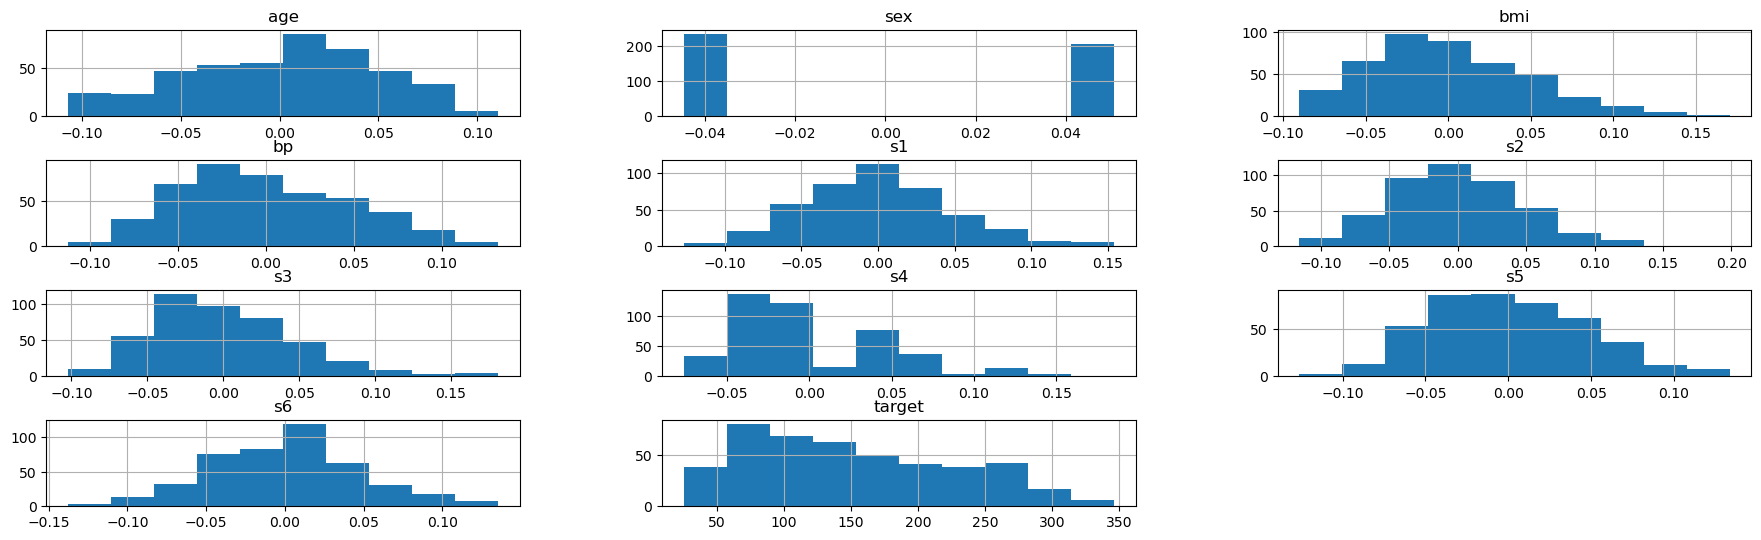

In [ ]:
h = df.hist(layout=(11,3))
plt.subplots_adjust(hspace=0.5)
plt.show()

*Density Plots:*

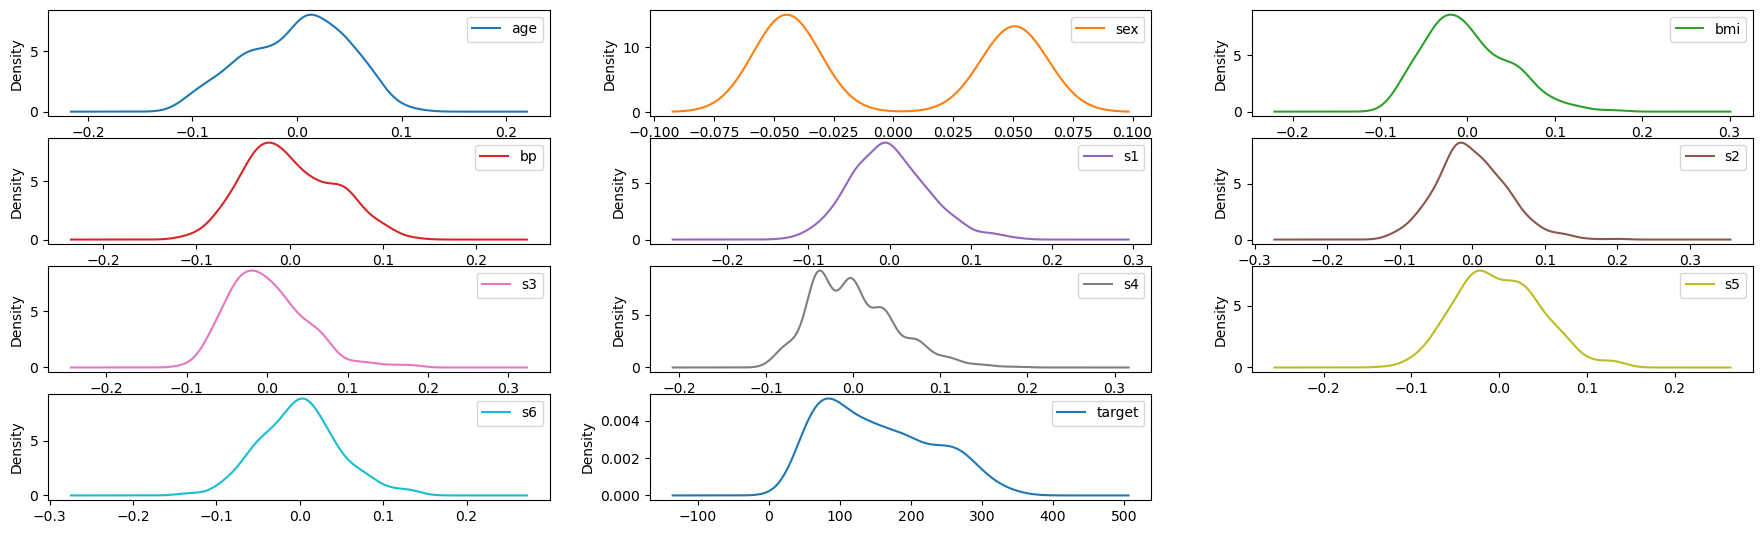

In [ ]:
df.plot(kind='density', subplots=True, layout=(11,3), sharex=False)
plt.show()

*Box plots:*

<AxesSubplot:>

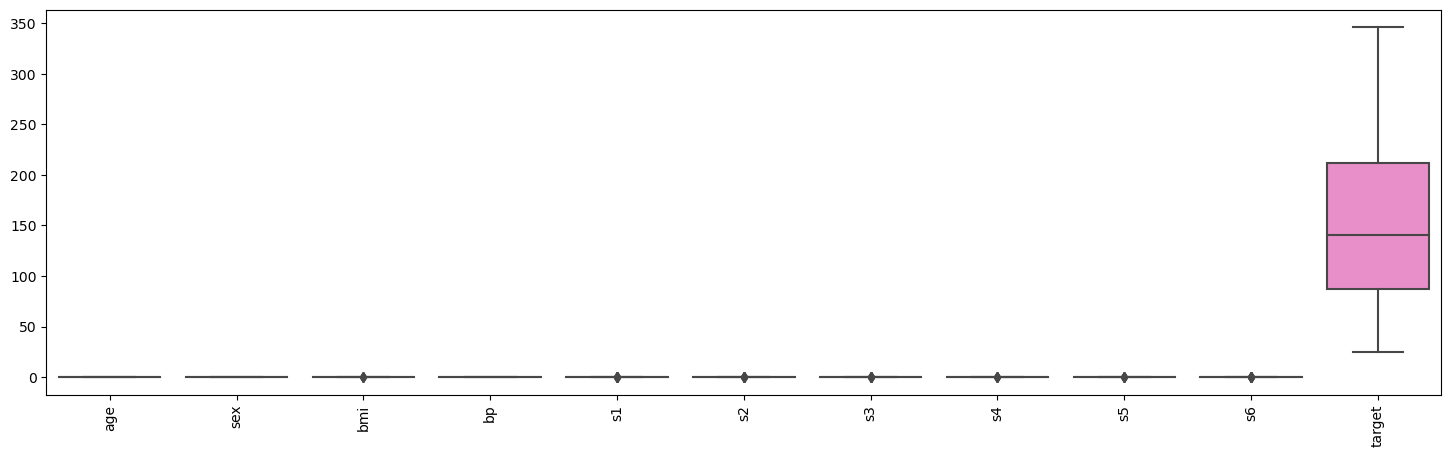

In [ ]:
plt.figure(figsize=(18,5))
plt.xticks(rotation=90)
sns.boxplot(data=df)

*Box plots after removing target column, which have high variance:*

**Comment:** We notice that features are in roughly the same scale and that we have few outliers. These observations will be useful for making decisions about the data transforms.

<AxesSubplot:>

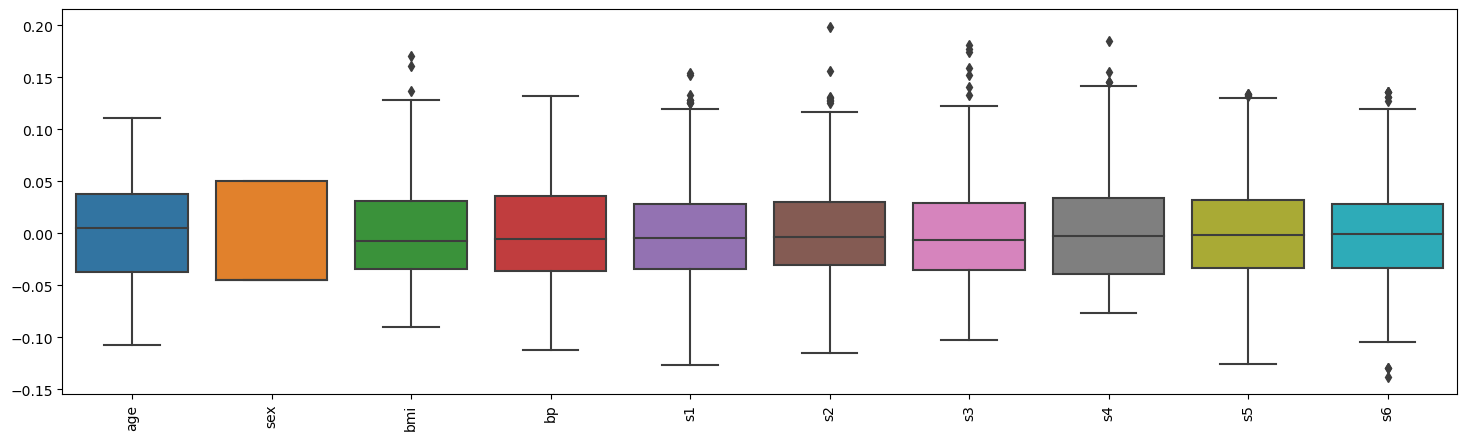

In [ ]:
stats_df = df.drop(['target'], axis=1)
plt.figure(figsize=(18,5))
plt.xticks(rotation=90)
sns.boxplot(data=stats_df)

### Multivariate plots to better understand relationships between attributes

**Comment:** Based on the heatmap below we see that there are correlations between certain features. Therefore, feature selection would be a beneficial step.

*Correlation Matrix:*

<AxesSubplot:>

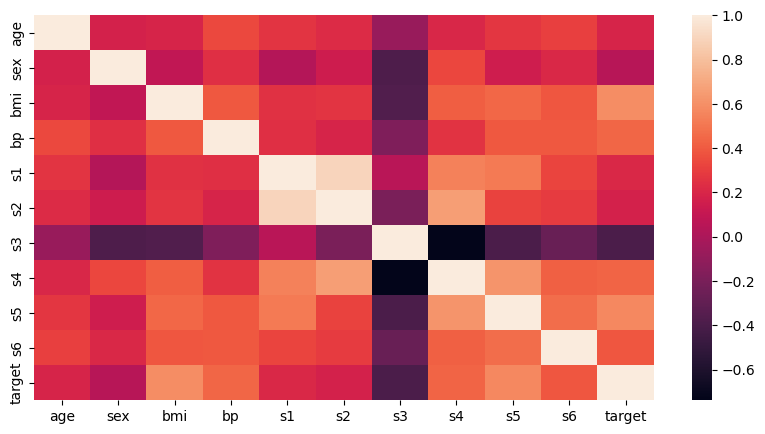

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(correlations)

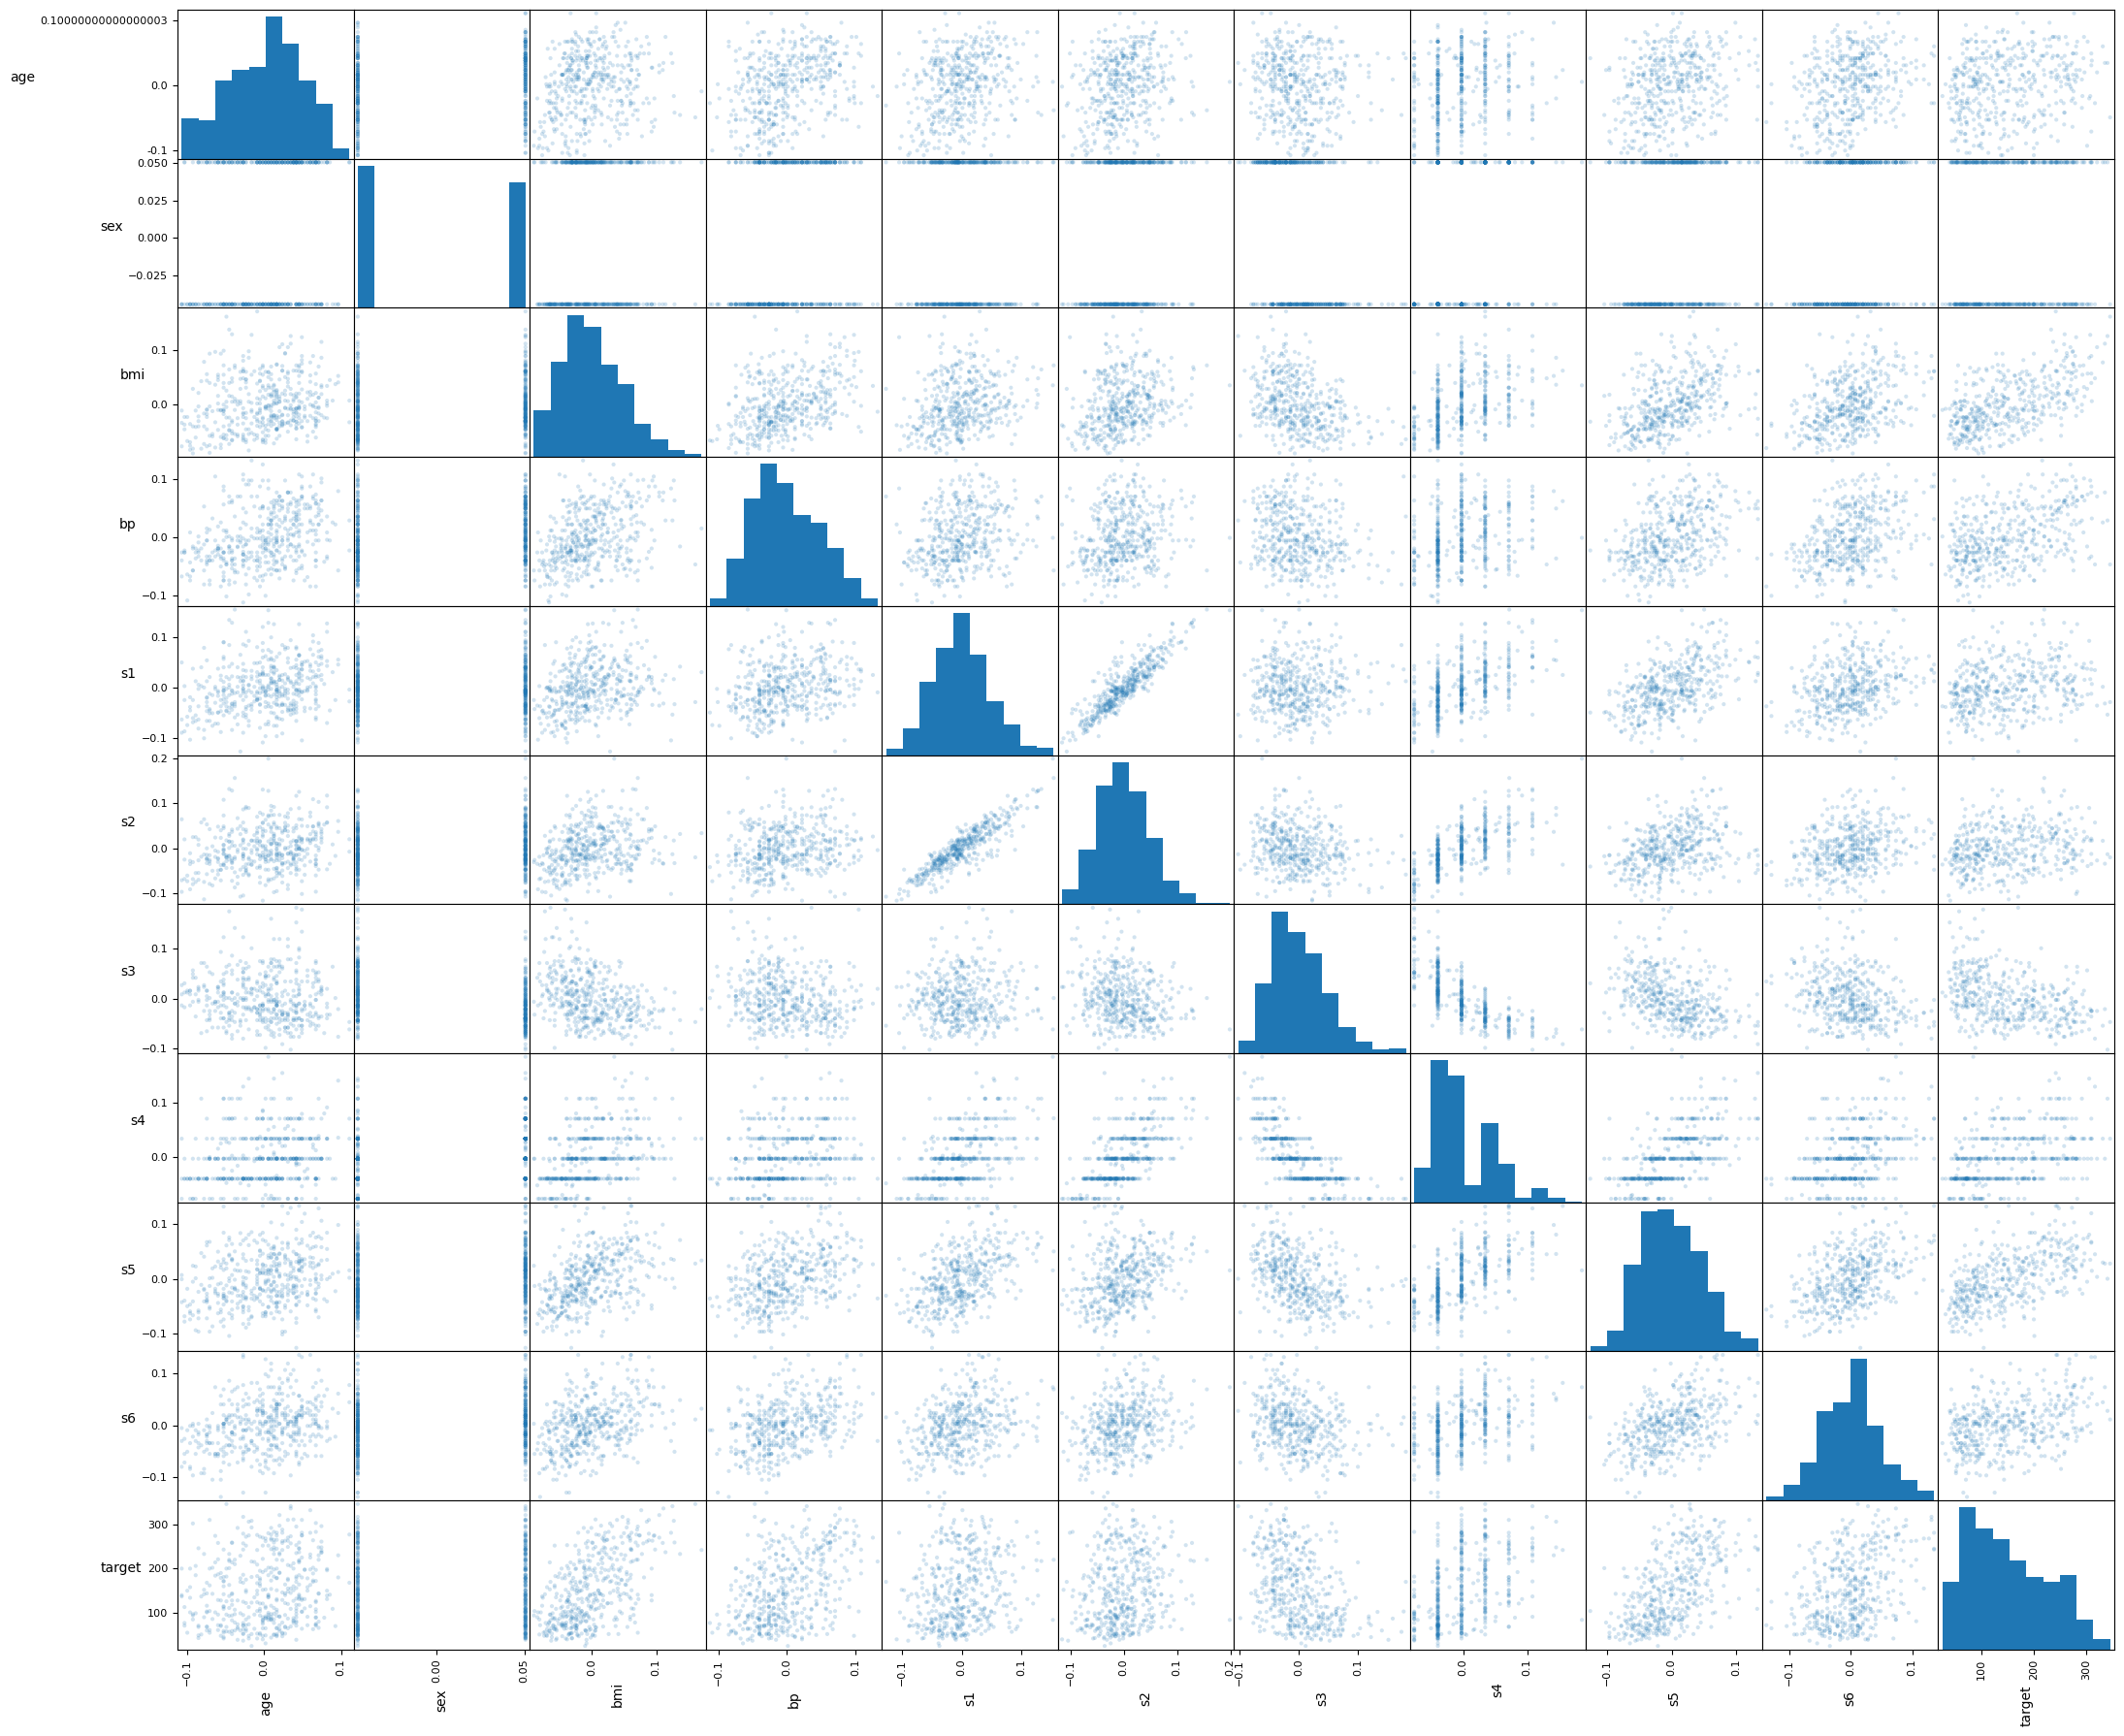

In [ ]:
# 'alpha=0.2' sets transparency for data points
axes = pd.plotting.scatter_matrix(df, alpha=0.2)

# Rotate x-axis labels by 90 degrees for better readability
# Rotate y-axis labels by 0 degrees (default) and align them to the right
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

# Adjust layout to prevent overlapping labels
plt.tight_layout()

# Adjust subplots to have zero spacing between them
plt.gcf().subplots_adjust(wspace=0, hspace=0)

plt.show()

## 4. Feature Engineering


- Feature Selection

1. Univariate feature reduction (remove low correlations with the target)

In [ ]:
# Calculate the absolute correlation of features with the target variable
cor_target = abs(correlations["target"])

# Select features with low correlation (less than 0.1) with the target variable
irrelevant_features = cor_target[cor_target < 0.1]

# Convert the names of irrelevant features to a list
features_to_be_removed = irrelevant_features.keys().tolist()
irrelevant_features

sex   0.043
Name: target, dtype: float64

2. Feature reduction based on collinearity (for each highly correlated pair of features, leave only the feature that correlates better with the target value).

In [ ]:
def high_cor_function(df):
    """
    Identify and display pairs of highly correlated features in a DataFrame.

    Parameters:
    - df (pd.DataFrame): Input DataFrame containing features.

    Returns:
    - pd.Series: Series containing pairs of highly correlated features.
    """

    print('Pairs of highly correlated features:')
    cor = abs(df.corr())
    # Transpose the DataFrame and calculate correlation coefficients
    corrm = np.corrcoef(df.transpose())
    # Subtract diagonal values to get only off-diagonal correlations
    corr = corrm - np.diagflat(corrm.diagonal())
    # Stack and sort correlations in descending order
    c1 = cor.stack().sort_values(ascending=False).drop_duplicates()
    # Filter out self-correlations (correlation with itself)
    high_cor = c1[c1.values!=1]
    thresh = 0.85
     # Display pairs of highly correlated features above the threshold
    display(high_cor[high_cor>thresh])

    return high_cor[high_cor>thresh]


high_cor = high_cor_function(df)
for indx, values in high_cor.items():
    if indx[0] != 'target' and indx[1] != 'target':
        # Check if either feature in the pair is in features_to_be_removed
        if indx[0] not in features_to_be_removed and indx[1] not in features_to_be_removed:
            # Choose the feature with lower correlation with the target value to be removed
            if cor_target[indx[0]] < cor_target[indx[1]]:
                features_to_be_removed.append(indx[0])
            else:
                features_to_be_removed.append(indx[1])

print('Features to be removed: ', features_to_be_removed)

Pairs of highly correlated features:


s1  s2   0.897
dtype: float64

Features to be removed:  ['sex', 's2']


**Comment:** Now we can see in the heatmap below that we do not have high correlations between the features, while the remaining features are significantly related to the target.

<AxesSubplot:>

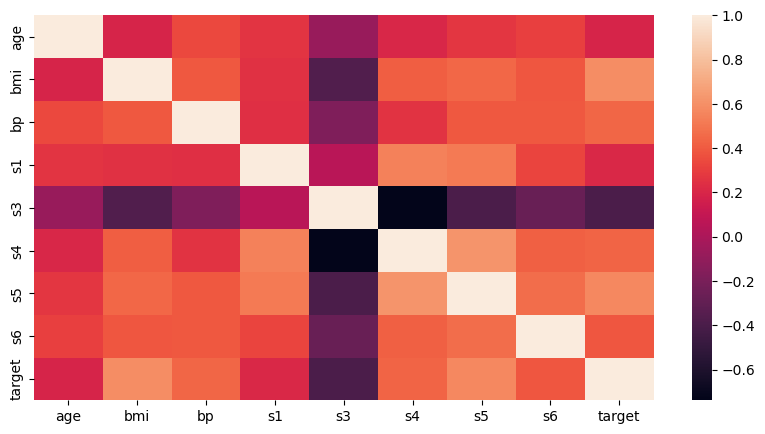

In [ ]:
# Create a new DataFrame by dropping the features to be removed and visualize the new correlations between features
new_df = df.drop(features_to_be_removed, axis=1)
new_correlations = new_df.corr(method='pearson')
plt.figure(figsize=(10,5))
sns.heatmap(new_correlations)

- Data Wrangling

Studying the univariate plots above we noticed that features are in roughly the same scale and that we have few outliers. Therefore, we would not choose to make any transformation to the data. However for comparison purposes in the context of the exercise we will apply normalization in order to retain the shape of the original distribution of the features.

In [ ]:
array = new_df.values
X = array[:,0:-1]
Y = array[:,-1]
# Use MinMaxScaler to fit and transform the feature columns for normalisation
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)


## 5. Evaluate Algorithms

We compare the set of regression algorithms we have chosen based on the negative mean squared error of their predictions using the cross-validation method.

**Comment:** As can be seen from the results of the comparison of the algorithms for the initial and rescaled dataset, normalization is not particularly beneficial in this case. Therefore, we will choose to develop our final model with the Ridge algorithm, as it has the lower absolute mean squared error in the different experiments.

### Evaluate algorithms also with normalisation/standardisation (along with the baseline)

In [ ]:
def compare_algorithms(models, scoring, X, Y):
    """
    Compare the performance of machine learning algorithms using cross-validation.

    Parameters:
    - models (list): List of tuples containing (name, model) pairs.
    - scoring (str): The scoring metric for evaluation.
    - X (array-like): Feature matrix.
    - Y (array-like): Target variable.

    Returns:
    - int: Index of the algorithm with the highest mean cross-validation score.
    """
    results = [] # List to store cross-validation results
    names   = [] # List to store algorithm names

    # Iterate over each algorithm and evaluate its performance
    for name, model in models:
        kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
        cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        print("%010s: %f (+/- %f)" % (name, cv_results.mean(), cv_results.std()))

    # Visualize the distribution of results
    plt.figure(figsize=(10,5))
    plt.boxplot(results)
    plt.xticks(list(range(1,len(names)+1)), names)
    plt.show()

    # Identify the index of the algorithm with the highest mean cross-validation score
    index_of_max = np.argmax(np.mean(results, axis=1))

    return index_of_max

        LR: -3098.350298 (+/- 417.772554)
     RIDGE: -3421.245578 (+/- 540.000758)
     LASSO: -3864.896538 (+/- 543.495293)
   ELASTIC: -5907.717599 (+/- 768.316690)
       kNN: -3656.630347 (+/- 759.627018)
        DT: -6741.740101 (+/- 1801.940467)


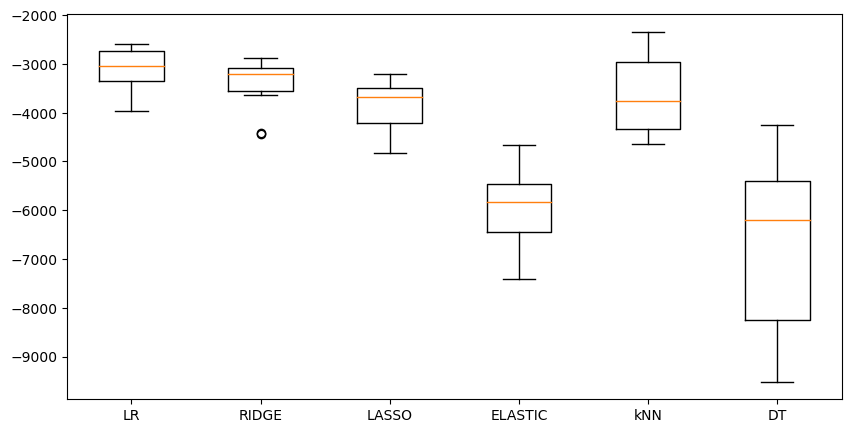

----- The best model for the initial dataset is  LR! -----

        LR: -3098.350298 (+/- 417.772554)
     RIDGE: -3086.195188 (+/- 429.660269)
     LASSO: -3144.050232 (+/- 452.153346)
   ELASTIC: -5180.813523 (+/- 721.796743)
       kNN: -3590.371176 (+/- 820.304179)
        DT: -6646.595152 (+/- 1565.036603)


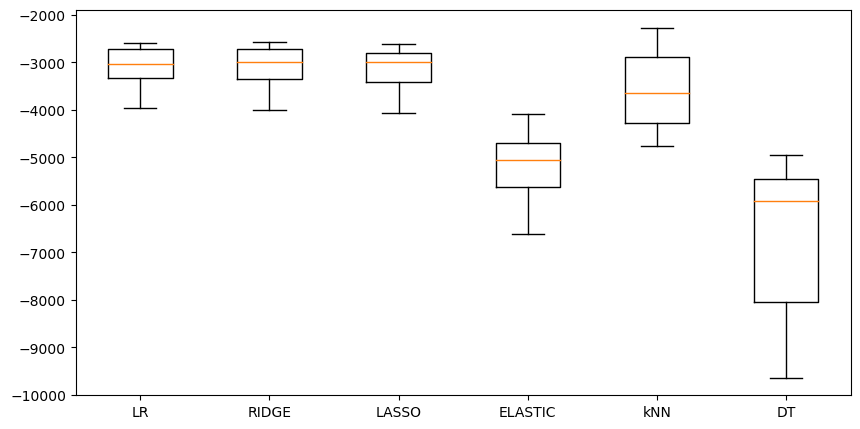

----- The best model for the rescaled dataset is RIDGE! -----


In [ ]:
# Create a list, with one item per algorithm. Each item has a name, and a classifier object.
models = []
models.append(('LR',      LinearRegression()))
models.append(('RIDGE',   Ridge()))
models.append(('LASSO',   Lasso()))
models.append(('ELASTIC', ElasticNet()))
models.append(('kNN',     KNeighborsRegressor()))
models.append(('DT',      DecisionTreeRegressor()))

# The scoring function to use
scoring = 'neg_mean_squared_error'

initial_best_model = compare_algorithms(models, scoring, X, Y)

print('----- The best model for the initial dataset is %03s! -----\n'% (models[initial_best_model][0]))

rescaled_best_model = compare_algorithms(models, scoring, rescaledX, Y)

print('----- The best model for the rescaled dataset is %03s! -----'% (models[rescaled_best_model][0]))

## 6. Improve Accuracy

Improve performance by hyperparameter optimisation.

**Comment:** We will attempted the following optimization for the RIDGE.

### Improve results with tuning for the winning algorithm

In [ ]:
# prepare a range of alpha values to test
alphas = np.array([1,0.1,0.01,0.001,0.0001,0])

grid_search = GridSearchCV(estimator=Ridge(), param_grid=dict(alpha=alphas), cv=5)
grid_result = grid_search.fit(X, Y)

# summarize the results of the grid search
print(grid_result.best_score_)
print(grid_result.best_estimator_.alpha)

0.4635504226107502
0.1


## 7. Finalise Model
Final model training, predictions on validation set and save model for later use.

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(rescaledX, Y, test_size=0.20, random_state=seed)

model = Ridge(alpha=1)
model.fit(X_train, Y_train)

from sklearn.metrics import mean_squared_error, r2_score
predicted = model.predict(X_test)

print('Coefficients: \n', model.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(Y_test, predicted))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y_test, predicted))

Coefficients: 
 [-14.5013038  140.84568408  68.61299377 -43.94144271 -35.40031737
  18.62977287 134.22727714  19.09436107]
Mean squared error: 2913.67
Variance score: 0.41


*Save model for later use:*

In [ ]:
# Save the trained model to a file using pickle
with open('.models/diabetes_model.pkl','wb') as f:
    pickle.dump(model,f)

# Load a previously saved model from a file using pickle
# with open('.models/diabetes_model.pkl', 'rb') as f:
#     model = pickle.load(f)